In [1]:
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import matplotlib.dates as md
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score

In [2]:
fname = 'f78/f78_AllData.csv'
data = pd.read_csv(fname, parse_dates = 'Time', infer_datetime_format = True)

In [3]:
data['Production'] = data['Inbound(lbs)'] + data['Onbound (lbs)']

In [4]:
data.to_csv('n78alldata.csv')

In [5]:
data.Time = pd.to_datetime(data['Time'])
data['ToD'] = data['Time'].apply(lambda x:x.to_datetime().hour)
data['Day'] = data['Time'].apply(lambda x:x.to_datetime().weekday())

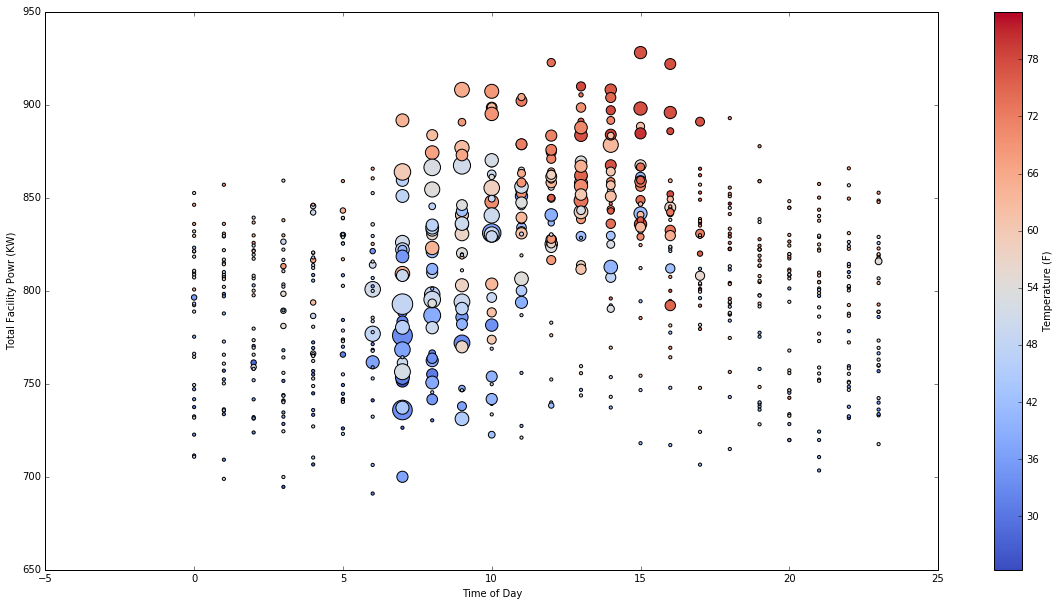

In [6]:
plt.figure(figsize=(20,10))
plt.scatter(x = data['ToD'], y = data['Total Facility Power'], c = data['Temperature(F)'], cmap=plt.cm.coolwarm, s = (data['Production']/1000)+10)
plt.xlabel('Time of Day')
plt.ylabel('Total Facility Powr (KW)')
plt.colorbar().set_label('Temperature (F)')
plt
plt.show()

In [7]:
temp = data[data['Day'] < 5][[ 'Total Facility Power', 'Temperature(F)', 'Production', 'ToD']].values
wd = pd.DataFrame(temp, columns = ['Total Facility Power', 'Temperature', 'Production', 'hours'])

In [8]:
temp = data[data['Day'] >= 5][[ 'Total Facility Power', 'Temperature(F)', 'Production', 'ToD']].values
we = pd.DataFrame(temp, columns = ['Total Facility Power', 'Temperature', 'Production', 'hours'])

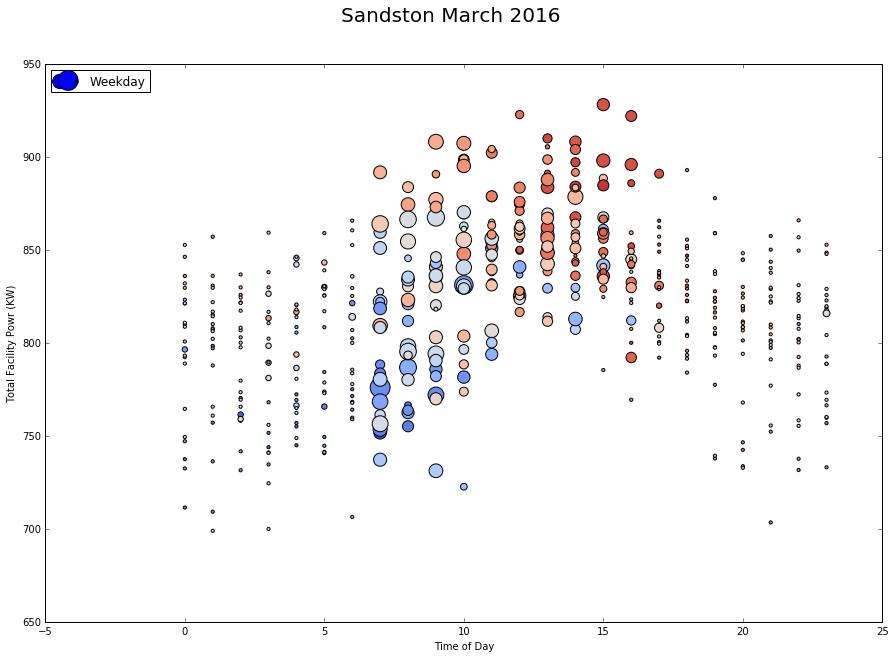

In [13]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Sandston March 2016', fontsize=20)
ax = fig.add_subplot(111)

#ax1.patch.set_facecolor('gray')
ax.scatter(wd['hours'], wd['Total Facility Power'],  c = wd['Temperature'], cmap=plt.cm.coolwarm, marker="o", label='Weekday', s = (wd['Production']/1000+10))
#ax.scatter(we['hours'],we['Total Facility Power'], c = we['Temperature'], cmap=plt.cm.coolwarm, marker="v", label='Weekend', s = (we['Production']/1000+10))


plt.legend(loc='upper left')
plt.xlabel('Time of Day')
plt.ylabel('Total Facility Powr (KW)')
plt.show()

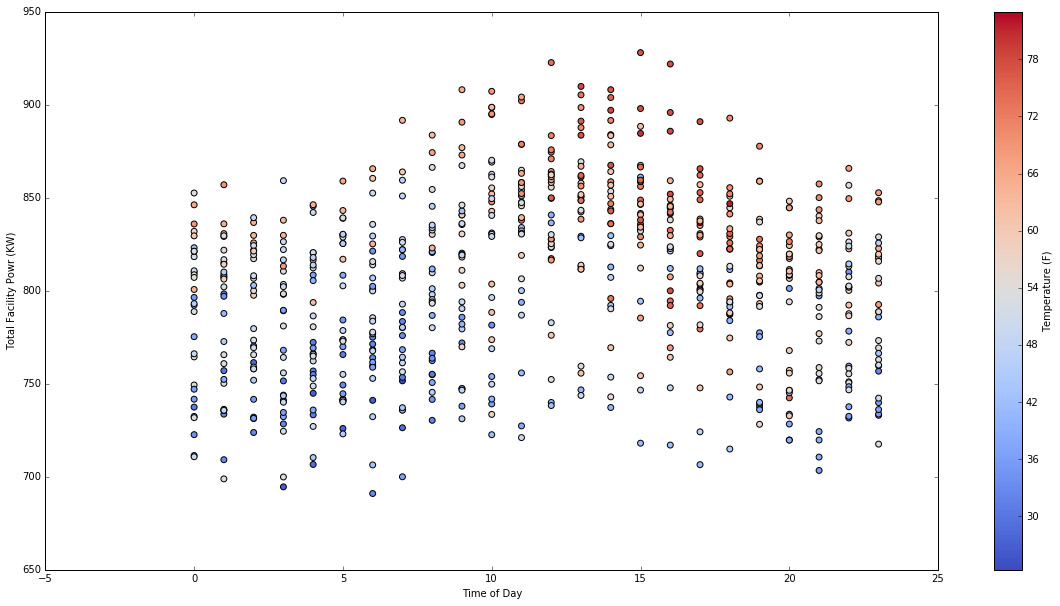

In [14]:
plt.figure(figsize=(20,10))
#plt.set_label('Sandston March 2016')
plt.scatter(x = data['ToD'], y = data['Total Facility Power'], c = data['Temperature(F)'], cmap=plt.cm.coolwarm, s = 35)
plt.xlabel('Time of Day')
plt.ylabel('Total Facility Powr (KW)')
plt.colorbar().set_label('Temperature (F)')
plt
plt.show()

In [13]:
linear = LinearRegression()

In [14]:
data.head(5)

,Time,Temperature(F),Total Facility Power,Inbound(lbs),Onbound (lbs),Production,ToD,Day
0,2016-03-01 00:00:00,41.80,823.173863,0,0,0,0,1
1,2016-03-01 01:00:00,40.83,787.818586,0,0,0,1,1
2,2016-03-01 02:00:00,35.73,741.652377,0,0,0,2,1
3,2016-03-01 03:00:00,37.26,768.046417,0,0,0,3,1
4,2016-03-01 04:00:00,36.34,808.480284,0,0,0,4,1


In [36]:
x = data[['Day','ToD','Temperature(F)', 'Production']]
y = data['Total Facility Power']
y = np.ravel(y)

In [23]:
x.shape

(718, 4)

In [29]:
linear.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
linear.score(x, y)

0.45506755601863569

In [32]:
from sklearn.cross_validation import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [38]:
linear.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
linear.score(x_train, y_train)

0.54885863693561587

In [41]:
y_predicted = linear.predict(x_test)

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(y_test, y_predicted)

0.42635166757388354

In [45]:
linear.coef_

array([ -4.64505777e+00,  -2.40752669e-01,   2.34557633e+00,
         1.73059866e-04])